# Import data

In [1]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the file with the Excel data and create a dataframe with its content to handle the data.
df = pd.read_excel('Hoja de registros acelerometría final (con todo) Jesús.xlsx')

In [2]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,EMOC,...,Unnamed: 27,Unnamed: 28,Marcha,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,nº,Sujeto,Edad,sexo,sexo2,Curso,altura,peso,IMC,Axis1,...,Axis3,Vector Magnitude,Axis1,Axis2,Axis3,Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros,babinsky weil,unterberger
1,1,YCR,12,M,1,6,148,55.6,25.383492,0.053763,...,0.709677,1.041935,36.19697,13,23.893939,47.096515,0,2,Apto,Apto
2,2,MCB,11,H,2,6,155,40.1,16.690947,1.688172,...,26.827957,44.528817,24.375,10.8125,27.890625,41.150938,9,1.833333,Apto,Apto
3,3,XCD,11,H,2,6,144,34.5,16.637731,0.322581,...,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667,0.333333,3.366667,Apto,Apto
4,4,DFC,11,H,2,6,156.5,48.8,19.92467,0.247312,...,0.204301,0.376344,21.246154,7.338462,16.692308,30.698,0,4,Izquierda,Apto


In [3]:
# Row number 0 has no data, it contains the names of the columns, so it needs to rename the columns so that there are no problems with the names.
df.columns = ['nº', 'Sujeto', 'Edad', 'sexo', 'sexo2', 'Curso', 'altura', 'peso', 'IMC', 'EMOC_Axis1', 'EMOC_Axis2', 'EMOC_Axis3', 'EMOC_Vector Magnitude', 
              'EBOA_Axis1', 'EBOA_Axis2', 'EBOA_Axis3', 'EBOA_Vector Magnitude', 'EMOA_Axis1', 'EMOA_Axis2', 'EMOA_Axis3', 'EMOA_Vector Magnitude',
              'EBOC_Axis1', 'EBOC_Axis2', 'EBOC_Axis3', 'EBOC_Vector Magnitude', 'EMC_Axis1', 'EMC_Axis2', 'EMC_Axis3', 'EMC_Vector Magnitude',
              'Marcha_Axis1', 'Marcha_Axis2', 'Marcha_Axis3', 'Marcha_Vector Magnitude', 
              'Test de Flamenco (veces posa pie en el suelo)', 'Equilibrio en barra (Andar banco sueco)metros', 'babinsky weil', 'unterberger']

# Delete row 0
df = df.drop([0])
df.head()

,nº,Sujeto,Edad,sexo,sexo2,Curso,altura,peso,IMC,EMOC_Axis1,...,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros,babinsky weil,unterberger
1,1,YCR,12,M,1,6,148,55.6,25.383492,0.053763,...,0.709677,1.041935,36.19697,13,23.893939,47.096515,0,2,Apto,Apto
2,2,MCB,11,H,2,6,155,40.1,16.690947,1.688172,...,26.827957,44.528817,24.375,10.8125,27.890625,41.150938,9,1.833333,Apto,Apto
3,3,XCD,11,H,2,6,144,34.5,16.637731,0.322581,...,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667,0.333333,3.366667,Apto,Apto
4,4,DFC,11,H,2,6,156.5,48.8,19.92467,0.247312,...,0.204301,0.376344,21.246154,7.338462,16.692308,30.698,0,4,Izquierda,Apto
5,5,HGP,12,H,2,6,148.2,38.7,17.620351,1.827957,...,0.333333,1.370968,15.87013,18.896104,23.311688,36.645584,0,4.333333,derecha,derecha


# Analysis

In [4]:
df.shape

(90, 37)

In [5]:
# Obtain data types of each column
df.dtypes

nº                                               object
Sujeto                                           object
Edad                                             object
sexo                                             object
sexo2                                            object
Curso                                            object
altura                                           object
peso                                             object
IMC                                              object
EMOC_Axis1                                       object
EMOC_Axis2                                       object
EMOC_Axis3                                       object
EMOC_Vector Magnitude                            object
EBOA_Axis1                                       object
EBOA_Axis2                                       object
EBOA_Axis3                                       object
EBOA_Vector Magnitude                            object
EMOA_Axis1                                      

In [6]:
# Obtain the unique values of each column
df.nunique()

nº                                               90
Sujeto                                           86
Edad                                              7
sexo                                              2
sexo2                                             2
Curso                                             6
altura                                           59
peso                                             82
IMC                                              90
EMOC_Axis1                                       90
EMOC_Axis2                                       90
EMOC_Axis3                                       87
EMOC_Vector Magnitude                            90
EBOA_Axis1                                       10
EBOA_Axis2                                       26
EBOA_Axis3                                       24
EBOA_Vector Magnitude                            34
EMOA_Axis1                                       70
EMOA_Axis2                                       85
EMOA_Axis3  

# DROP Non -relevant data

### Demographic and descriptive information:
    'Nº' (number): It is not relevant to the analysis.
    'Subject': It can be relevant to identify which subject the data belongs but for training it is eliminated.

### Anthropometric information:
    'Age', 'Sex', 'Height', 'Weight', 'BMO': They can be relevant depending on the relationship between these variables and falls. It is considered to maintain these columns for possible descriptive or correlation analysis.

### test results and evaluations:
    The columns related to specific tests such as 'flamenco test' and 'bar balance' are the target columns.
    The 'Babinsky Weil', 'Unterberger' columns are not relevant in our case so they are eliminated.

### Accelerometry data:
    The columns that begin with 'Emot_', 'Emoa_', 'EMC_', 'March_': These are what contain accelerometry data.
    The columns within 'EBOA_' and 'EBOC_' contain too many null data, so they will be removed.

In [7]:
# Eliminate non -relevant columns for study
columnas_no_relevantes = ['nº', 'sexo', 'Curso', 'Sujeto']
df = df.drop(columns=columnas_no_relevantes)
df.head()

,Edad,sexo2,altura,peso,IMC,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude,EBOA_Axis1,...,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros,babinsky weil,unterberger
1,12,1,148,55.6,25.383492,0.053763,0.677419,0.569892,1.093763,0.301075,...,0.709677,1.041935,36.19697,13,23.893939,47.096515,0,2,Apto,Apto
2,11,2,155,40.1,16.690947,1.688172,28.322581,19.172043,38.574839,0.021505,...,26.827957,44.528817,24.375,10.8125,27.890625,41.150938,9,1.833333,Apto,Apto
3,11,2,144,34.5,16.637731,0.322581,2.849462,0.763441,3.372688,0,...,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667,0.333333,3.366667,Apto,Apto
4,11,2,156.5,48.8,19.92467,0.247312,2.591398,1.301075,3.376774,0,...,0.204301,0.376344,21.246154,7.338462,16.692308,30.698,0,4,Izquierda,Apto
5,12,2,148.2,38.7,17.620351,1.827957,6.290323,3.989247,9.080323,0,...,0.333333,1.370968,15.87013,18.896104,23.311688,36.645584,0,4.333333,derecha,derecha


In [8]:
# The columns within EBOA and EBOC contain too many null data, so they will be removed.
df = df.drop(['EBOA_Axis1', 'EBOA_Axis2', 'EBOA_Axis3', 'EBOA_Vector Magnitude', 'EBOC_Axis1', 'EBOC_Axis2', 'EBOC_Axis3', 'EBOC_Vector Magnitude'], axis=1)
df.head()

,Edad,sexo2,altura,peso,IMC,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude,EMOA_Axis1,...,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros,babinsky weil,unterberger
1,12,1,148,55.6,25.383492,0.053763,0.677419,0.569892,1.093763,0,...,0.709677,1.041935,36.19697,13,23.893939,47.096515,0,2,Apto,Apto
2,11,2,155,40.1,16.690947,1.688172,28.322581,19.172043,38.574839,4.11828,...,26.827957,44.528817,24.375,10.8125,27.890625,41.150938,9,1.833333,Apto,Apto
3,11,2,144,34.5,16.637731,0.322581,2.849462,0.763441,3.372688,0.258065,...,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667,0.333333,3.366667,Apto,Apto
4,11,2,156.5,48.8,19.92467,0.247312,2.591398,1.301075,3.376774,0.268817,...,0.204301,0.376344,21.246154,7.338462,16.692308,30.698,0,4,Izquierda,Apto
5,12,2,148.2,38.7,17.620351,1.827957,6.290323,3.989247,9.080323,0.021505,...,0.333333,1.370968,15.87013,18.896104,23.311688,36.645584,0,4.333333,derecha,derecha


In [9]:
# The 'Babinsky Weil', 'Unterberger' columns are eliminated
df = df.drop(['babinsky weil', 'unterberger'], axis=1)
df.head()

,Edad,sexo2,altura,peso,IMC,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude,EMOA_Axis1,...,EMC_Axis1,EMC_Axis2,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros
1,12,1,148,55.6,25.383492,0.053763,0.677419,0.569892,1.093763,0,...,0.064516,0.408602,0.709677,1.041935,36.19697,13,23.893939,47.096515,0,2
2,11,2,155,40.1,16.690947,1.688172,28.322581,19.172043,38.574839,4.11828,...,11.311828,22.612903,26.827957,44.528817,24.375,10.8125,27.890625,41.150938,9,1.833333
3,11,2,144,34.5,16.637731,0.322581,2.849462,0.763441,3.372688,0.258065,...,0.473118,2.946237,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667,0.333333,3.366667
4,11,2,156.5,48.8,19.92467,0.247312,2.591398,1.301075,3.376774,0.268817,...,0,0.172043,0.204301,0.376344,21.246154,7.338462,16.692308,30.698,0,4
5,12,2,148.2,38.7,17.620351,1.827957,6.290323,3.989247,9.080323,0.021505,...,0,1.215054,0.333333,1.370968,15.87013,18.896104,23.311688,36.645584,0,4.333333


# Data Engineering

In [10]:
# Get the average, fashion, ... from each column
df.describe()

,Edad,sexo2,altura,peso,IMC,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude,EMOA_Axis1,...,EMC_Axis1,EMC_Axis2,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros
count,90,90,90.0,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,...,90.0,90.000000,90.0,90.000000,90.00000,90.0,90.000000,90.000000,90.0,90.0
unique,7,2,59.0,82.0,90.000000,90.000000,90.000000,87.000000,90.000000,70.0,...,80.0,85.000000,89.0,90.000000,90.00000,90.0,90.000000,90.000000,31.0,79.0
top,10,2,145.0,29.4,25.383492,0.053763,0.677419,0.569892,1.093763,0.0,...,0.0,0.344086,0.0,1.041935,36.19697,13.0,23.893939,47.096515,0.0,2.0
freq,22,47,4.0,2.0,1.000000,1.000000,1.000000,2.000000,1.000000,13.0,...,8.0,3.000000,2.0,1.000000,1.00000,1.0,1.000000,1.000000,31.0,4.0


In [11]:
# Replace null values (0) of the 'emotion_' columns, 'emoa_', 'EMC_', 'march
df['EMOC_Axis1'] = df['EMOC_Axis1'].replace(0, df['EMOC_Axis1'].mean())
df['EMOC_Axis2'] = df['EMOC_Axis2'].replace(0, df['EMOC_Axis2'].mean())
df['EMOC_Axis3'] = df['EMOC_Axis3'].replace(0, df['EMOC_Axis3'].mean())
df['EMOC_Vector Magnitude'] = df['EMOC_Vector Magnitude'].replace(0, df['EMOC_Vector Magnitude'].mean())

df['EMOA_Axis1'] = df['EMOA_Axis1'].replace(0, df['EMOA_Axis1'].mean())
df['EMOA_Axis2'] = df['EMOA_Axis2'].replace(0, df['EMOA_Axis2'].mean())
df['EMOA_Axis3'] = df['EMOA_Axis3'].replace(0, df['EMOA_Axis3'].mean())
df['EMOA_Vector Magnitude'] = df['EMOA_Vector Magnitude'].replace(0, df['EMOA_Vector Magnitude'].mean())

df['EMC_Axis1'] = df['EMC_Axis1'].replace(0, df['EMC_Axis1'].mean())
df['EMC_Axis2'] = df['EMC_Axis2'].replace(0, df['EMC_Axis2'].mean())
df['EMC_Axis3'] = df['EMC_Axis3'].replace(0, df['EMC_Axis3'].mean())
df['EMC_Vector Magnitude'] = df['EMC_Vector Magnitude'].replace(0, df['EMC_Vector Magnitude'].mean())

df['Marcha_Axis1'] = df['Marcha_Axis1'].replace(0, df['Marcha_Axis1'].mean())
df['Marcha_Axis2'] = df['Marcha_Axis2'].replace(0, df['Marcha_Axis2'].mean())
df['Marcha_Axis3'] = df['Marcha_Axis3'].replace(0, df['Marcha_Axis3'].mean())
df['Marcha_Vector Magnitude'] = df['Marcha_Vector Magnitude'].replace(0, df['Marcha_Vector Magnitude'].mean())

df.head()

,Edad,sexo2,altura,peso,IMC,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude,EMOA_Axis1,...,EMC_Axis1,EMC_Axis2,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude,Test de Flamenco (veces posa pie en el suelo),Equilibrio en barra (Andar banco sueco)metros
1,12,1,148,55.6,25.383492,0.053763,0.677419,0.569892,1.093763,3.758542,...,0.064516,0.408602,0.709677,1.041935,36.19697,13,23.893939,47.096515,0,2
2,11,2,155,40.1,16.690947,1.688172,28.322581,19.172043,38.574839,4.118280,...,11.311828,22.612903,26.827957,44.528817,24.375,10.8125,27.890625,41.150938,9,1.833333
3,11,2,144,34.5,16.637731,0.322581,2.849462,0.763441,3.372688,0.258065,...,0.473118,2.946237,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667,0.333333,3.366667
4,11,2,156.5,48.8,19.92467,0.247312,2.591398,1.301075,3.376774,0.268817,...,8.635006,0.172043,0.204301,0.376344,21.246154,7.338462,16.692308,30.698,0,4
5,12,2,148.2,38.7,17.620351,1.827957,6.290323,3.989247,9.080323,0.021505,...,8.635006,1.215054,0.333333,1.370968,15.87013,18.896104,23.311688,36.645584,0,4.333333


In [12]:
df.isnull().sum()

Edad                                             0
sexo2                                            0
altura                                           0
peso                                             0
IMC                                              0
EMOC_Axis1                                       0
EMOC_Axis2                                       0
EMOC_Axis3                                       0
EMOC_Vector Magnitude                            0
EMOA_Axis1                                       0
EMOA_Axis2                                       0
EMOA_Axis3                                       0
EMOA_Vector Magnitude                            0
EMC_Axis1                                        0
EMC_Axis2                                        0
EMC_Axis3                                        0
EMC_Vector Magnitude                             0
Marcha_Axis1                                     0
Marcha_Axis2                                     0
Marcha_Axis3                   

# Check columns No accelerometry

You have to find out if the 'age' columns, 'sex2', 'height', 'weight', 'BM' have relevance in the study, so they will be analyzed.

They can be grouped.

In [13]:
df['Edad'].value_counts()

10    22
11    15
7     14
8     11
9     10
6     10
12     8
Name: Edad, dtype: int64

In [14]:
df['sexo2'].value_counts()

2    47
1    43
Name: sexo2, dtype: int64

In [15]:
df['altura'].value_counts()

145.0    4
148.0    3
137.0    3
129.0    3
135.0    3
143.0    3
147.0    3
139.0    3
132.0    2
123.0    2
125.5    2
125.0    2
127.0    2
142.0    2
155.0    2
149.0    2
133.0    2
131.0    2
152.0    2
157.0    2
127.5    2
124.0    2
128.5    1
144.0    1
136.5    1
123.5    1
158.3    1
118.0    1
158.5    1
114.0    1
115.0    1
128.0    1
119.0    1
118.5    1
117.0    1
116.0    1
124.5    1
145.5    1
133.5    1
144.5    1
146.5    1
154.7    1
140.3    1
156.0    1
162.0    1
142.5    1
160.0    1
150.0    1
139.5    1
134.5    1
148.2    1
151.7    1
159.2    1
156.5    1
137.5    1
136.0    1
143.5    1
138.0    1
120.0    1
Name: altura, dtype: int64

In [16]:
df['peso'].value_counts()

29.4    2
34.1    2
40.9    2
35.6    2
25.2    2
       ..
34.6    1
54.9    1
33.3    1
34.0    1
28.0    1
Name: peso, Length: 82, dtype: int64

In [17]:
df['IMC'].value_counts()

25.383492    1
19.538101    1
17.152000    1
21.983679    1
16.458457    1
            ..
26.111772    1
17.111805    1
16.171225    1
14.846566    1
17.920000    1
Name: IMC, Length: 90, dtype: int64

In [18]:
# At the moment these columns are eliminated to be able to study vs static columns
df = df.drop(['Edad', 'sexo2', 'altura', 'peso', 'IMC'], axis=1)

# Visualize data


# 1. ** Visual review: **
   - ** Boxploots and dispersion graphics: **
      - Use boxploots and dispersion graphics to visualize the distribution of the data.
      - Look for points that are significantly removed from most data in dispersion graphics.
      - Boxplots allow identifying atypical values more easily.

<Axes: >

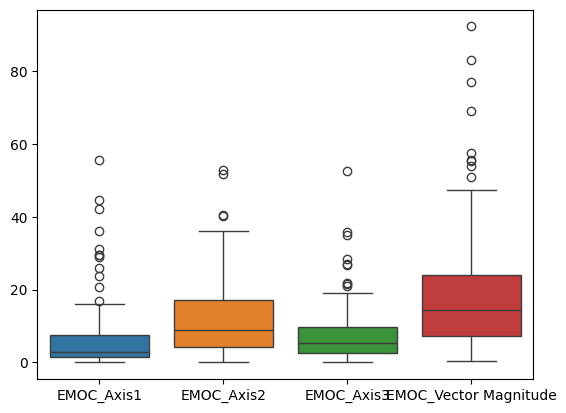

In [19]:
# Visualize the data of the emotional columns1, emotion
df_EMOC = df[['EMOC_Axis1', 'EMOC_Axis2', 'EMOC_Axis3', 'EMOC_Vector Magnitude']]
sns.boxplot(data=df_EMOC)

<Axes: >

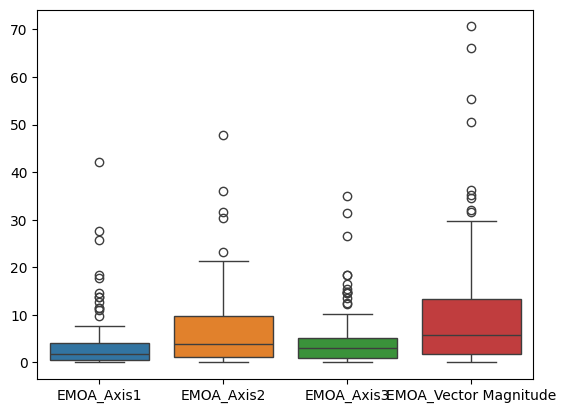

In [20]:
# View the data of the Emoa_axis1, Emoa_axis2, Emoa_axis3, Emoa_vector magnitude columns with a graph
df_EMOA = df[['EMOA_Axis1', 'EMOA_Axis2', 'EMOA_Axis3', 'EMOA_Vector Magnitude']]
sns.boxplot(data=df_EMOA)

<Axes: >

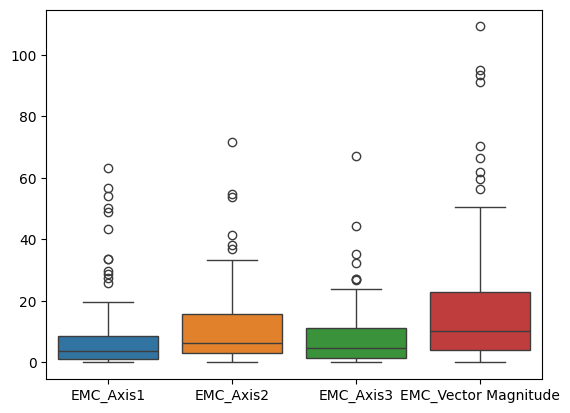

In [21]:
# Display the data of the EMC_AXIS1, EMC_AXIS2, EMC_AXIS3, EMC_VECTOR MAGRAGE WITH A GRAPH
df_EMC = df[['EMC_Axis1', 'EMC_Axis2', 'EMC_Axis3', 'EMC_Vector Magnitude']]
sns.boxplot(data=df_EMC)

<Axes: >

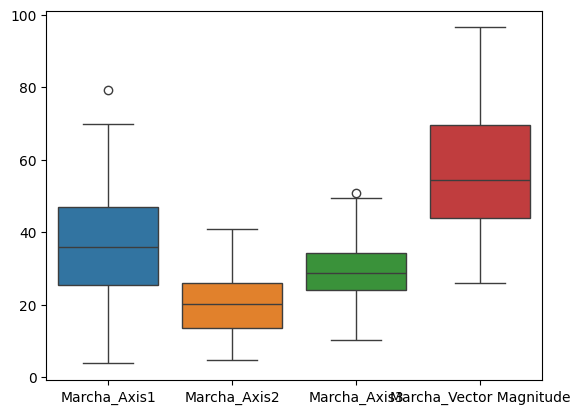

In [22]:
# Visualize the data of the Columns march
df_Marcha = df[['Marcha_Axis1', 'Marcha_Axis2', 'Marcha_Axis3', 'Marcha_Vector Magnitude']]
sns.boxplot(data=df_Marcha)

<Axes: >

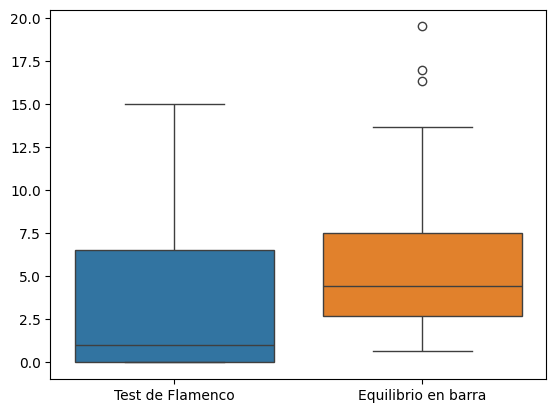

In [23]:
# Visualize the data of the flamenco test columns (sometimes poses foot on the ground), equilibrium in a bar (Swedish bench) meters with a graphics
df_FB = df[['Test de Flamenco (veces posa pie en el suelo)', 'Equilibrio en barra (Andar banco sueco)metros']]
df_FB.columns = ['Test de Flamenco', 'Equilibrio en barra']
sns.boxplot(data=df_FB)

### Boxplots by test (static features)
For the "Data Analysis" section

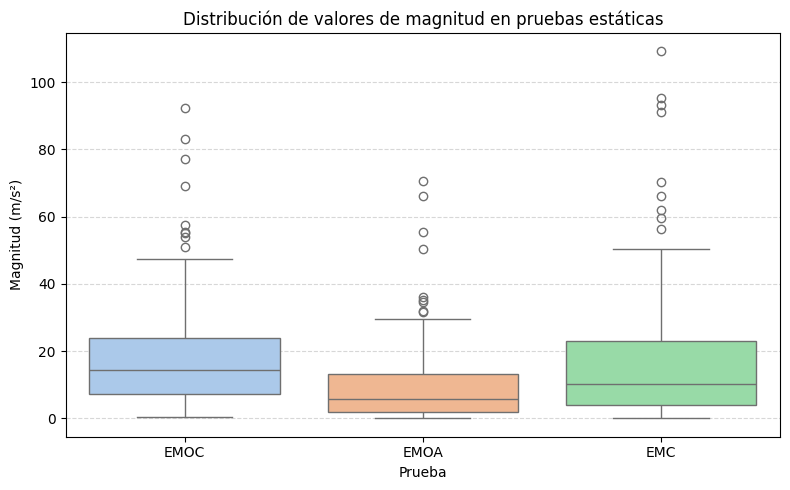

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Join all static variables
static_cols = [
    'EMOC_Vector Magnitude', 'EMOA_Vector Magnitude', 'EMC_Vector Magnitude'
]

df_box = df[static_cols].copy()
df_box.columns = ['EMOC', 'EMOA', 'EMC']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_box, palette="pastel")
plt.title("Distribución de valores de magnitud en pruebas estáticas")
plt.ylabel("Magnitud (m/s²)")
plt.xlabel("Prueba")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Histogram of the objective variables
For the beginning of the "preprocessing" subsection, when speaking of its behavior and extreme values.

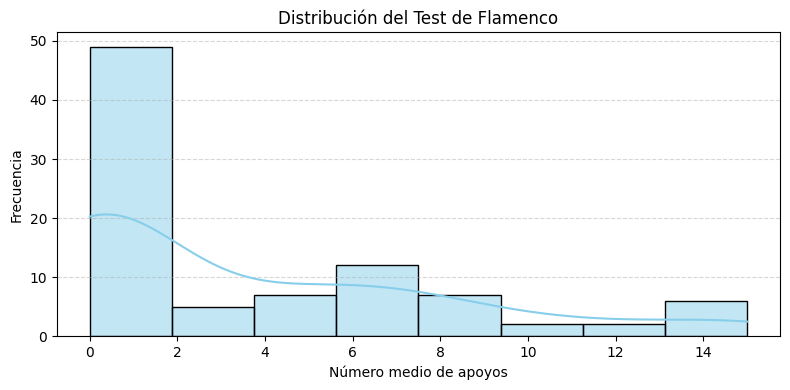

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Test de Flamenco (veces posa pie en el suelo)'], kde=True, color='skyblue')
plt.title("Distribución del Test de Flamenco")
plt.xlabel("Número medio de apoyos")
plt.ylabel("Frecuencia")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


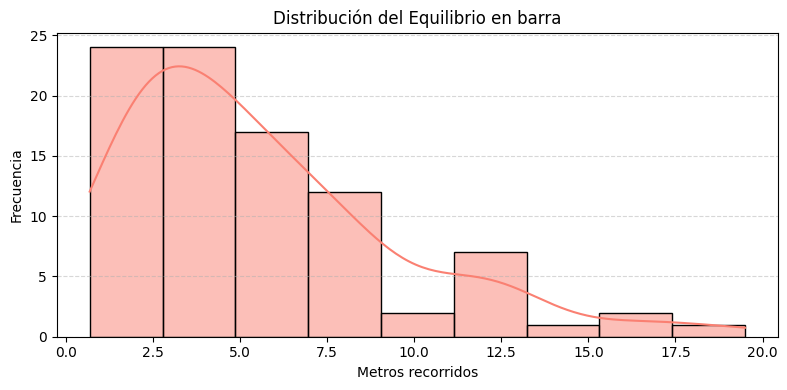

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Equilibrio en barra (Andar banco sueco)metros'], kde=True, color='salmon')
plt.title("Distribución del Equilibrio en barra")
plt.xlabel("Metros recorridos")
plt.ylabel("Frecuencia")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. ** Descriptive statistics: **
   - ** Statistics Summary: **
     - Calculate descriptive statistics for each data set, such as average, median, standard deviation, interquartic range, etc.
     - Examine extreme or unusual values.

In [27]:
df_EMOC.describe()


,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude
count,90.000000,90.000000,90.000000,90.000000
mean,7.610151,12.592018,8.101090,19.774400
std,10.982232,11.295467,9.002966,19.374588
min,0.010753,0.204301,0.096774,0.472151
25%,1.465054,4.338710,2.607527,7.216613
50%,2.946237,8.887097,5.252688,14.302957
75%,7.513172,17.139785,9.666667,23.970027
max,55.645161,52.849462,52.526882,92.266237


In [28]:
df_EMOA.describe()

,EMOA_Axis1,EMOA_Axis2,EMOA_Axis3,EMOA_Vector Magnitude
count,90.000000,90.000000,90.000000,90.000000
mean,4.301443,6.813105,5.304009,11.148341
std,6.745298,8.631887,6.725185,14.276764
min,0.010753,0.021505,0.021505,0.021505
25%,0.456989,1.094086,0.873656,1.831478
50%,1.741935,3.924731,2.940860,5.693978
75%,4.115591,9.803763,5.190860,13.301237
max,42.075269,47.731183,35.000000,70.635161


In [29]:
df_EMC.describe()

,EMC_Axis1,EMC_Axis3
count,90.000000,90.000000
mean,9.402562,8.409701
std,14.019428,10.951847
min,0.010753,0.043011
25%,1.053763,1.260753
50%,3.844086,4.725806
75%,8.635006,11.309140
max,63.247312,67.000000


In [30]:
df_Marcha.describe()

,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude
count,90.00000,90.0,90.000000,90.000000
unique,90.00000,90.0,90.000000,90.000000
top,36.19697,13.0,23.893939,47.096515
freq,1.00000,1.0,1.000000,1.000000


In [31]:
df_FB.describe()

,Test de Flamenco,Equilibrio en barra
count,90.0,90.0
unique,31.0,79.0
top,0.0,2.0
freq,31.0,4.0


# 3. ** Outliers identification: **
   - ** Statistical criteria: **
     - Use statistical criteria to identify outliers, such as those that are beyond 1.5 times the interquartilical range (IQR) in a boxploot.
     - More advanced methods are also considered, such as Tukey's method to identify outliers.

In [32]:
for column in df_EMOC.columns:
    Q1 = df_EMOC[column].quantile(0.25)
    Q3 = df_EMOC[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_EMOC[(df_EMOC[column] < lower_bound) | (df_EMOC[column] > upper_bound)]

    print(f"Outliers para {column}:")
    print(outliers)

Outliers para EMOC_Axis1:
    EMOC_Axis1  EMOC_Axis2  EMOC_Axis3  EMOC_Vector Magnitude
47   31.193548   29.075269   26.967742              55.519462
65   28.967742   28.096774   26.612903              55.278602
66   16.870968   17.043011   11.623656              31.535591
68   25.849462   40.096774   21.419355              57.610000
70   23.645161   29.161290   15.612903              45.148602
76   20.731183   17.440860   13.021505              34.584194
80   55.645161   24.655914   21.913978              69.128280
81   44.698925   40.376344   35.107527              77.108710
82   29.569892   29.182796   16.387097              50.895054
85   29.494624   24.924731   28.247312              53.956022
89   42.064516   51.602151   35.688172              83.147204
90   36.021505   52.849462   52.526882              92.266237
Outliers para EMOC_Axis2:
    EMOC_Axis1  EMOC_Axis2  EMOC_Axis3  EMOC_Vector Magnitude
68   25.849462   40.096774   21.419355              57.610000
81   44.698925   4

In [33]:
for column in df_EMOA.columns:
    Q1 = df_EMOA[column].quantile(0.25)
    Q3 = df_EMOA[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_EMOA[(df_EMOA[column] < lower_bound) | (df_EMOA[column] > upper_bound)]

    print(f"Outliers para {column}:")
    print(outliers)

Outliers para EMOA_Axis1:
    EMOA_Axis1  EMOA_Axis2  EMOA_Axis3  EMOA_Vector Magnitude
44    9.731183    4.075269    2.612903              11.272581
45   14.688172   21.290323   15.526882              34.605376
47   13.774194   20.860215   18.408602              36.169355
61   10.946237   11.247312   14.698925              24.350108
65   11.387097   20.053763   14.645161              32.039355
68   27.655914   31.559140   18.376344              50.533871
70   11.440860   18.645161   12.462366              29.655376
80   18.473118   14.817204   12.354839              31.565376
81   42.075269   36.043011   31.354839              70.635161
82   13.817204   13.795699    9.344086              25.112258
87   12.634409   23.150538   14.483871              35.237527
89   25.623656   47.731183   26.505376              66.058710
90   17.688172   30.258065   35.000000              55.333226
Outliers para EMOA_Axis2:
    EMOA_Axis1  EMOA_Axis2  EMOA_Axis3  EMOA_Vector Magnitude
68   27.655914   3

In [34]:
for column in df_EMC.columns:
    Q1 = df_EMC[column].quantile(0.25)
    Q3 = df_EMC[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_EMC[(df_EMC[column] < lower_bound) | (df_EMC[column] > upper_bound)]

    print(f"Outliers para {column}:")
    print(outliers)

Outliers para EMC_Axis1:
    EMC_Axis1  EMC_Axis2  EMC_Axis3 EMC_Vector Magnitude
45  25.720430  28.612903  20.849462            50.200968
68  56.720430  54.677419  32.387097            91.281075
69  33.580645  28.817204  21.752688            56.226452
70  29.827957  38.225806  26.967742            61.923011
76  33.602151  14.688172  14.956989            42.232688
77  27.440860  16.344086  15.634409            38.705054
80  48.731183  19.827957  15.118280            59.494839
81  63.247312  41.451613  35.075269            93.280108
82  50.279570  33.419355  23.408602            70.197742
85  43.365591  30.784946  27.032258            66.271505
89  54.096774  71.537634  44.258065           109.232258
90  28.849462  53.688172  67.000000            95.172258
Outliers para EMC_Axis2:
    EMC_Axis1  EMC_Axis2  EMC_Axis3 EMC_Vector Magnitude
68  56.720430  54.677419  32.387097            91.281075
70  29.827957  38.225806  26.967742            61.923011
81  63.247312  41.451613  35.075269   

In [35]:
for column in df_Marcha.columns:
    Q1 = df_Marcha[column].quantile(0.25)
    Q3 = df_Marcha[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_Marcha[(df_Marcha[column] < lower_bound) | (df_Marcha[column] > upper_bound)]

    print(f"Outliers para {column}:")
    print(outliers)

Outliers para Marcha_Axis1:
   Marcha_Axis1 Marcha_Axis2 Marcha_Axis3 Marcha_Vector Magnitude
85    79.232143        24.75       38.875                96.51125
Outliers para Marcha_Axis2:
Empty DataFrame
Columns: [Marcha_Axis1, Marcha_Axis2, Marcha_Axis3, Marcha_Vector Magnitude]
Index: []
Outliers para Marcha_Axis3:
   Marcha_Axis1 Marcha_Axis2 Marcha_Axis3 Marcha_Vector Magnitude
23    57.788462    29.423077    50.923077               85.792115
Outliers para Marcha_Vector Magnitude:
Empty DataFrame
Columns: [Marcha_Axis1, Marcha_Axis2, Marcha_Axis3, Marcha_Vector Magnitude]
Index: []


In [36]:
for column in df_FB.columns:
    Q1 = df_FB[column].quantile(0.25)
    Q3 = df_FB[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_FB[(df_FB[column] < lower_bound) | (df_FB[column] > upper_bound)]

    print(f"Outliers para {column}:")
    print(outliers)

Outliers para Test de Flamenco:
Empty DataFrame
Columns: [Test de Flamenco, Equilibrio en barra]
Index: []
Outliers para Equilibrio en barra:
   Test de Flamenco Equilibrio en barra
7                 0           16.333333
14                0                  17
21                1                19.5


# === Separate analysis: static vs dynamic ===

In [37]:

# Objective variables
targets = ['Test de Flamenco (veces posa pie en el suelo)', 'Equilibrio en barra (Andar banco sueco)metros']

# Static input variables
static_features = [
    'EMOC_Axis1', 'EMOC_Axis2', 'EMOC_Axis3', 'EMOC_Vector Magnitude',
    'EMOA_Axis1', 'EMOA_Axis2', 'EMOA_Axis3', 'EMOA_Vector Magnitude',
    'EMC_Axis1', 'EMC_Axis2', 'EMC_Axis3', 'EMC_Vector Magnitude'
]

# Dynamic input variables
dynamic_features = [
    'Marcha_Axis1', 'Marcha_Axis2', 'Marcha_Axis3', 'Marcha_Vector Magnitude'
]

# Sets x and y
X_static = df[static_features]
X_dynamic = df[dynamic_features]
y_flamenco = df[targets[0]]
y_barra = df[targets[1]]


In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def entrenar_y_graficar(X, y, label=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelos = {
        'LinearRegression': LinearRegression(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
    }

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"[{label}] Modelo: {nombre}")
        print(f"MSE: {mse:.4f}")
        print(f"R² : {r2:.4f}\n")

        # Display
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Valor real")
        plt.ylabel("Predicción")
        plt.title(f"{label} - {nombre}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


=== Estático - Test de Flamenco ===
[Estático - Flamenco] Modelo: LinearRegression
MSE: 10.2191
R² : 0.4217



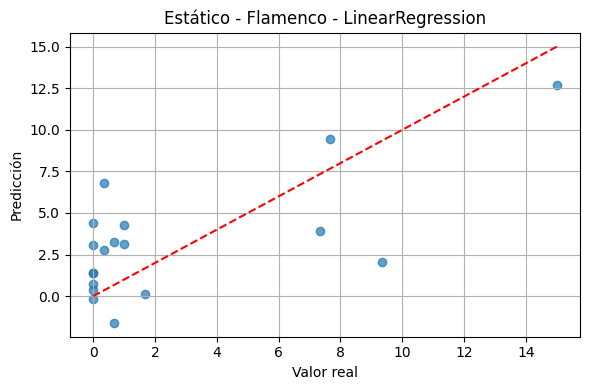

[Estático - Flamenco] Modelo: DecisionTree
MSE: 22.7716
R² : -0.2887



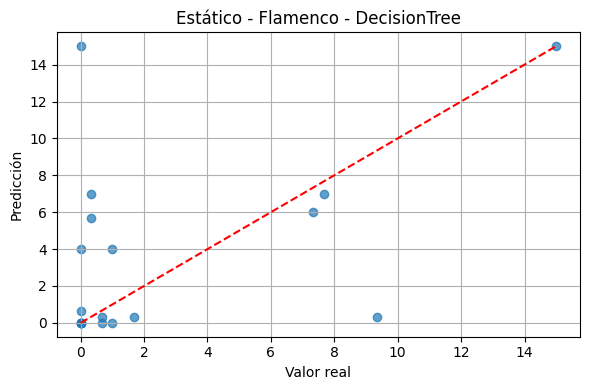

[Estático - Flamenco] Modelo: RandomForest
MSE: 9.7147
R² : 0.4502



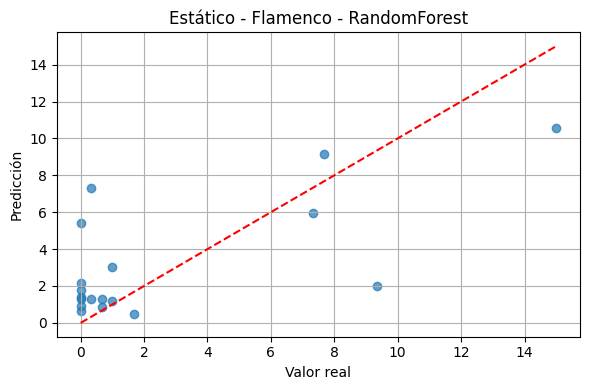

=== Estático - Equilibrio en barra ===
[Estático - Barra] Modelo: LinearRegression
MSE: 10.4391
R² : 0.2749



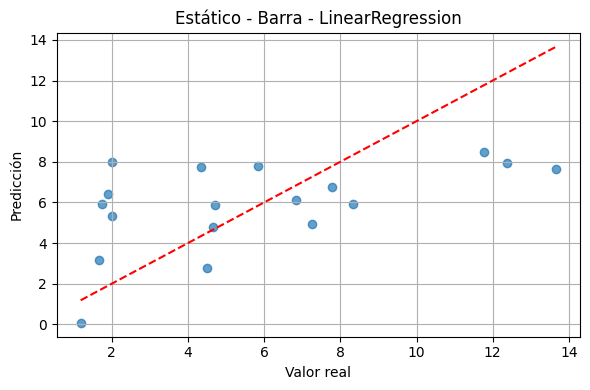

[Estático - Barra] Modelo: DecisionTree
MSE: 19.2387
R² : -0.3364



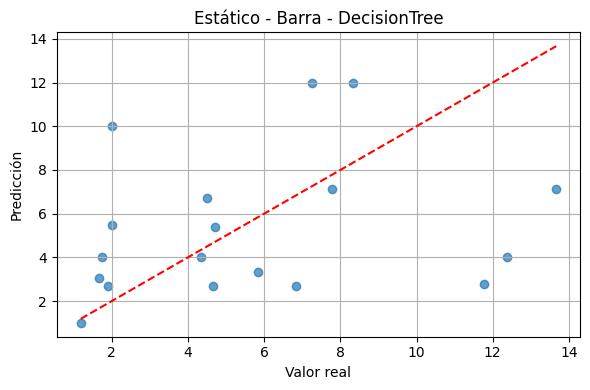

[Estático - Barra] Modelo: RandomForest
MSE: 10.0566
R² : 0.3014



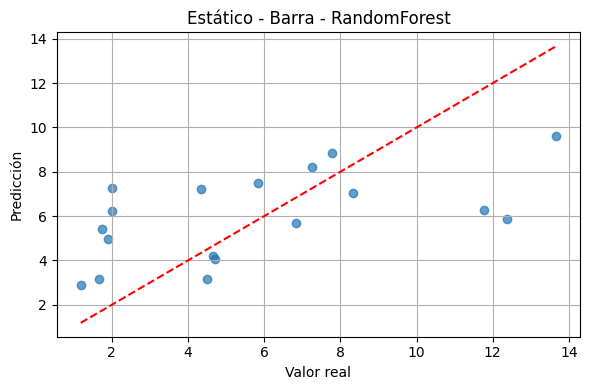

=== Dinámico - Test de Flamenco ===
[Dinámico - Flamenco] Modelo: LinearRegression
MSE: 18.2454
R² : -0.0326



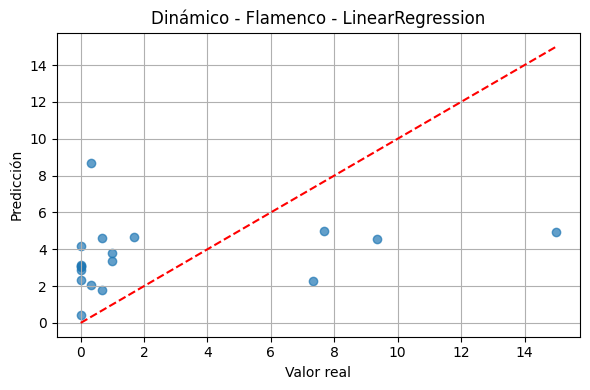

[Dinámico - Flamenco] Modelo: DecisionTree
MSE: 43.3519
R² : -1.4534



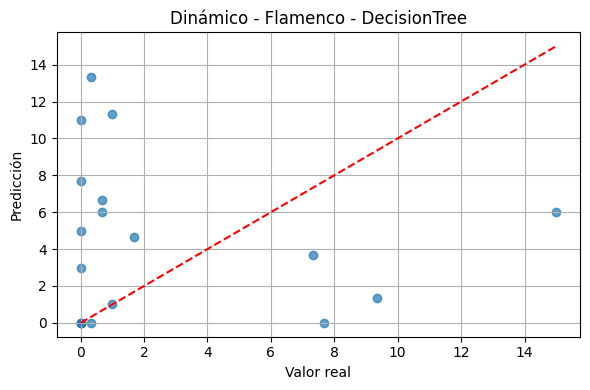

[Dinámico - Flamenco] Modelo: RandomForest
MSE: 24.1322
R² : -0.3657



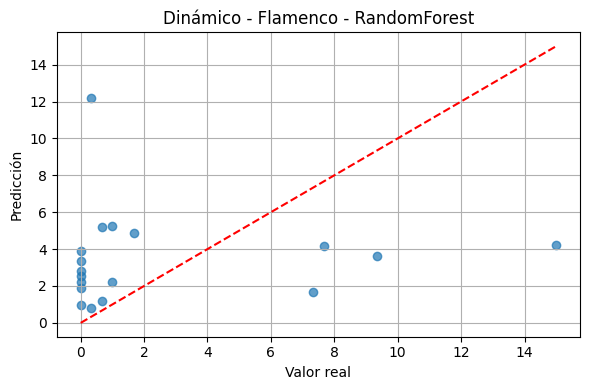

=== Dinámico - Equilibrio en barra ===
[Dinámico - Barra] Modelo: LinearRegression
MSE: 12.4992
R² : 0.1318



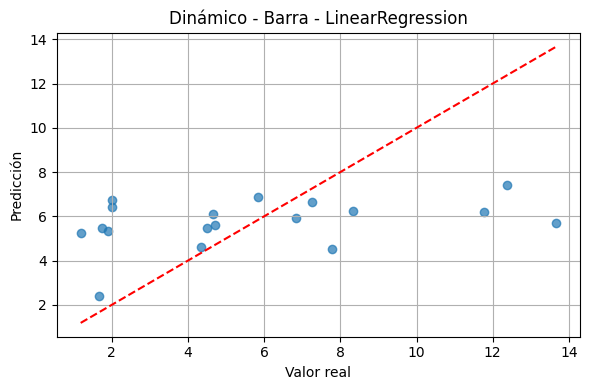

[Dinámico - Barra] Modelo: DecisionTree
MSE: 32.1950
R² : -1.2364



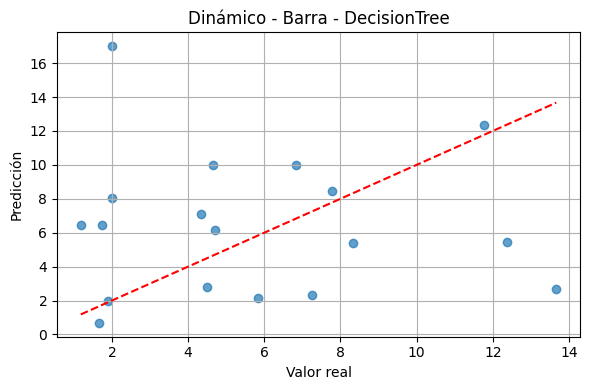

[Dinámico - Barra] Modelo: RandomForest
MSE: 16.8291
R² : -0.1690



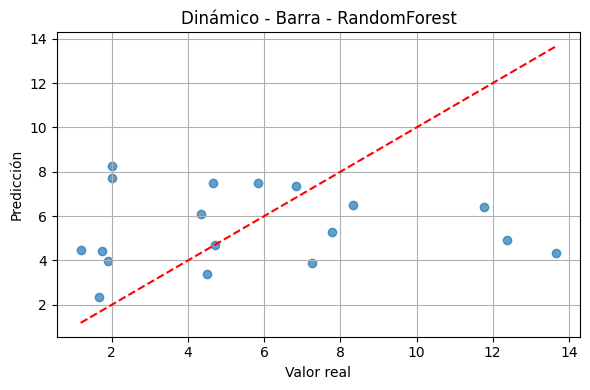

In [39]:
# === Execution of the analysis ===

print("=== static - flamenco test ===")
entrenar_y_graficar(X_static, y_flamenco, label="Estático - Flamenco")

print("=== Static - Balance at bar ===")
entrenar_y_graficar(X_static, y_barra, label="Estático - Barra")

print("=== dynamic - flamenco test ===")
entrenar_y_graficar(X_dynamic, y_flamenco, label="Dinámico - Flamenco")

print("=== Dynamic - Balance at bar ===")
entrenar_y_graficar(X_dynamic, y_barra, label="Dinámico - Barra")


# Cross validation

## Model schemes
- Decision tree: shows the structure of the tree, where each node is represented with the decision condition, the value of the average of the sheet nodes, and the frequency of the classes.

- Random Forest: visualizes the importance of the characteristics in the model.

- KNN, SVR and Gradient Boosting: Present the parameters of each model to give an idea of how they are configured.

In [61]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



def validar_modelos_crossval_ampliado(X, y, label=""):
    modelos = {
        'LinearRegression': LinearRegression(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42),
        'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor()),
        'SVR': make_pipeline(StandardScaler(), SVR()),
        'GradientBoosting': GradientBoostingRegressor(random_state=42)
    }

    print(f"\n--- Validación cruzada (5-Fold): {label} ---")

    for nombre, modelo in modelos.items():
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        neg_mse_scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=kf)
        r2_scores = cross_val_score(modelo, X, y, scoring='r2', cv=kf)

        mse_mean = -neg_mse_scores.mean()
        r2_mean = r2_scores.mean()

        print(f"Modelo: {nombre}")
        print(f"MSE promedio: {mse_mean:.4f}")
        print(f"R² promedio: {r2_mean:.4f}")
        print("-" * 30)


In [62]:
validar_modelos_crossval_ampliado(X_static, y_flamenco, label="Estático - Flamenco")
validar_modelos_crossval_ampliado(X_static, y_barra, label="Estático - Barra")



--- Validación cruzada (5-Fold): Estático - Flamenco ---
Modelo: LinearRegression
MSE promedio: 17.2055
R² promedio: 0.1045
------------------------------
Modelo: DecisionTree
MSE promedio: 27.3994
R² promedio: -0.5147
------------------------------
Modelo: RandomForest
MSE promedio: 12.6540
R² promedio: 0.2836
------------------------------
Modelo: KNN
MSE promedio: 13.6615
R² promedio: 0.2682
------------------------------
Modelo: SVR
MSE promedio: 14.6428
R² promedio: 0.2431
------------------------------
Modelo: GradientBoosting
MSE promedio: 14.5630
R² promedio: 0.1469
------------------------------

--- Validación cruzada (5-Fold): Estático - Barra ---
Modelo: LinearRegression
MSE promedio: 14.6596
R² promedio: -0.0423
------------------------------
Modelo: DecisionTree
MSE promedio: 29.2053
R² promedio: -1.2247
------------------------------
Modelo: RandomForest
MSE promedio: 15.3445
R² promedio: -0.0433
------------------------------
Modelo: KNN
MSE promedio: 13.5820
R² promed

# Viewing results

## Prediction graphs vs real value
I already implemented them before in the analysis separately. I will keep them as they are, since:

- They are very useful to show the visual relationship between real values and predictions.

- A figure per model or by subset can be included, depending on the space in memory.

Use the best model graphs (Random Forest) on static data as the main example.

## Error curves

Models for error curves:
- Random forest → number of trees (n_estimators)
- KNN → Number of neighbors (N_neightBors)

#### Error curve for Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

def curva_error_random_forest(X, y, estimadores_range=range(10, 201, 10), label=""):
    from sklearn.model_selection import cross_val_score
    mse_scores = []

    for n in estimadores_range:
        modelo = RandomForestRegressor(n_estimators=n, random_state=42)
        scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=5)
        mse_scores.append(-scores.mean())

    plt.figure(figsize=(8, 4))
    plt.plot(estimadores_range, mse_scores, marker='o')
    plt.title(f"Curva de error – Random Forest ({label})")
    plt.xlabel("Número de árboles (n_estimators)")
    plt.ylabel("MSE promedio")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


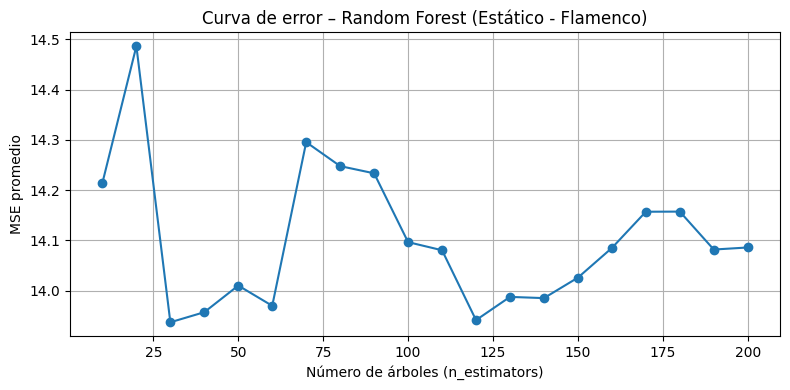

In [45]:
curva_error_random_forest(X_static, y_flamenco, label="Estático - Flamenco")


#### Error curve for KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def curva_error_knn(X, y, vecinos_range=range(1, 21), label=""):
    mse_scores = []

    for k in vecinos_range:
        modelo = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
        scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=5)
        mse_scores.append(-scores.mean())

    plt.figure(figsize=(8, 4))
    plt.plot(vecinos_range, mse_scores, marker='o')
    plt.title(f"Curva de error – KNN ({label})")
    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("MSE promedio")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


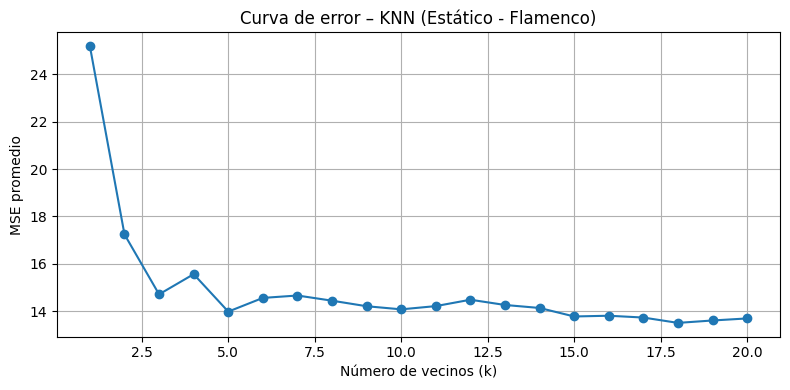

In [47]:
curva_error_knn(X_static, y_flamenco, label="Estático - Flamenco")


## Importance of characteristics

In [42]:
def mostrar_importancia_variables(modelo, X, top_n=10, titulo="Importancia de características"):
    importances = modelo.feature_importances_
    features = X.columns
    sorted_idx = importances.argsort()[::-1][:top_n]

    plt.figure(figsize=(8, 4))
    plt.barh(range(top_n), importances[sorted_idx], align='center')
    plt.yticks(range(top_n), [features[i] for i in sorted_idx])
    plt.xlabel("Importancia relativa")
    plt.title(titulo)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


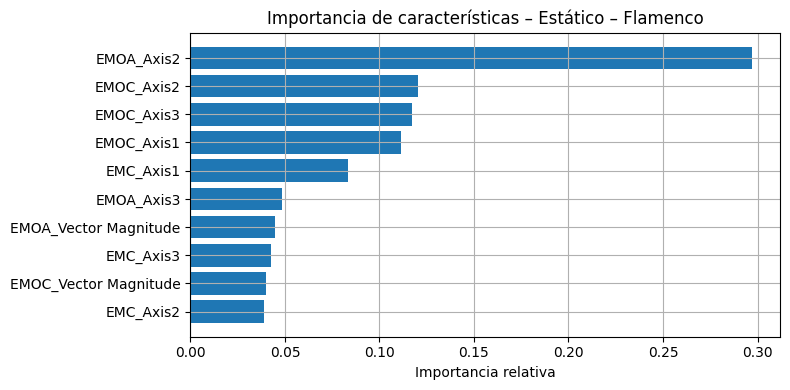

In [43]:
# Use of the graph with an already trained model (Random Forest on Emos)
# Train final model with all data
final_rf = RandomForestRegressor(random_state=42)
final_rf.fit(X_static, y_flamenco)

# Visualize importance
mostrar_importancia_variables(final_rf, X_static, titulo="Importancia de características – Estático – Flamenco")


# Dynamic VS tests (without outliers)

In [ ]:
# List of indices to be deleted (visually identified outliers)
outliers_idx = [23, 68, 80, 81, 82, 85, 87, 88, 89, 90]

# Create clean dataset
df_sin_outliers = df.drop(index=outliers_idx).reset_index(drop=True)

# Redefine input and output sets
# Objective variables
targets = ['Test de Flamenco (veces posa pie en el suelo)', 'Equilibrio en barra (Andar banco sueco)metros']

# Static features
static_features = [
    'EMOC_Axis1', 'EMOC_Axis2', 'EMOC_Axis3', 'EMOC_Vector Magnitude',
    'EMOA_Axis1', 'EMOA_Axis2', 'EMOA_Axis3', 'EMOA_Vector Magnitude',
    'EMC_Axis1', 'EMC_Axis2', 'EMC_Axis3', 'EMC_Vector Magnitude'
]

# Dynamic features
dynamic_features = [
    'Marcha_Axis1', 'Marcha_Axis2', 'Marcha_Axis3', 'Marcha_Vector Magnitude'
]

# New subset
X_static_clean = df_sin_outliers[static_features]
X_dynamic_clean = df_sin_outliers[dynamic_features]
y_flamenco_clean = df_sin_outliers[targets[0]]
y_barra_clean = df_sin_outliers[targets[1]]


(90, 18)

#### Cross validation with data without outliers

In [56]:
def validar_modelos_crossval_ampliado(X, y, label=""):
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.svm import SVR
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler

    modelos = {
        'LinearRegression': LinearRegression(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42),
        'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor()),
        'SVR': make_pipeline(StandardScaler(), SVR()),
        'GradientBoosting': GradientBoostingRegressor(random_state=42)
    }

    print(f"\n--- Validación cruzada (sin outliers): {label} ---")

    for nombre, modelo in modelos.items():
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        neg_mse_scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=kf)
        r2_scores = cross_val_score(modelo, X, y, scoring='r2', cv=kf)

        mse_mean = -neg_mse_scores.mean()
        r2_mean = r2_scores.mean()

        print(f"Modelo: {nombre}")
        print(f"MSE promedio: {mse_mean:.4f}")
        print(f"R² promedio: {r2_mean:.4f}")
        print("-" * 30)


In [57]:
validar_modelos_crossval_ampliado(X_static_clean, y_flamenco_clean, label="Estático - Flamenco (sin outliers)")
validar_modelos_crossval_ampliado(X_static_clean, y_barra_clean, label="Estático - Barra (sin outliers)")



--- Validación cruzada (sin outliers): Estático - Flamenco (sin outliers) ---
Modelo: LinearRegression
MSE promedio: 16.0864
R² promedio: -0.0739
------------------------------
Modelo: DecisionTree
MSE promedio: 18.1573
R² promedio: -0.1180
------------------------------
Modelo: RandomForest
MSE promedio: 12.3717
R² promedio: 0.2035
------------------------------
Modelo: KNN
MSE promedio: 12.4561
R² promedio: 0.1846
------------------------------
Modelo: SVR
MSE promedio: 12.5028
R² promedio: 0.2670
------------------------------
Modelo: GradientBoosting
MSE promedio: 15.5466
R² promedio: -0.0456
------------------------------

--- Validación cruzada (sin outliers): Estático - Barra (sin outliers) ---
Modelo: LinearRegression
MSE promedio: 17.7731
R² promedio: -0.2239
------------------------------
Modelo: DecisionTree
MSE promedio: 26.5622
R² promedio: -1.3315
------------------------------
Modelo: RandomForest
MSE promedio: 15.0662
R² promedio: -0.1874
------------------------------

# Dynamic vs static (old) tests
# Original Block - Complete Analysis with all the variables
# Commented because now a separate analysis is performed by type of test (static vs dynamic) above

In [34]:
df.shape

(90, 18)

In [35]:
# The objective columns ('flamenco test' and 'balance in bar') are the ones that are going to be predicted, so they will separate from the original dataframe
df_objetivo = df[['Test de Flamenco (veces posa pie en el suelo)', 'Equilibrio en barra (Andar banco sueco)metros']]
df_objetivo.columns = ['Test de Flamenco', 'Equilibrio en barra']   
df = df.drop(['Test de Flamenco (veces posa pie en el suelo)', 'Equilibrio en barra (Andar banco sueco)metros'], axis=1)
df.head()

,EMOC_Axis1,EMOC_Axis2,EMOC_Axis3,EMOC_Vector Magnitude,EMOA_Axis1,EMOA_Axis2,EMOA_Axis3,EMOA_Vector Magnitude,EMC_Axis1,EMC_Axis2,EMC_Axis3,EMC_Vector Magnitude,Marcha_Axis1,Marcha_Axis2,Marcha_Axis3,Marcha_Vector Magnitude
1,0.053763,0.677419,0.569892,1.093763,3.758542,0.333333,1.150538,1.333226,0.064516,0.408602,0.709677,1.041935,36.19697,13,23.893939,47.096515
2,1.688172,28.322581,19.172043,38.574839,4.118280,14.215054,16.419355,26.933656,11.311828,22.612903,26.827957,44.528817,24.375,10.8125,27.890625,41.150938
3,0.322581,2.849462,0.763441,3.372688,0.258065,2.935484,0.526882,3.303333,0.473118,2.946237,1.010753,3.752796,23.783333,14.633333,28.566667,43.517667
4,0.247312,2.591398,1.301075,3.376774,0.268817,0.903226,0.053763,1.109140,8.635006,0.172043,0.204301,0.376344,21.246154,7.338462,16.692308,30.698
5,1.827957,6.290323,3.989247,9.080323,0.021505,0.978495,0.247312,1.165914,8.635006,1.215054,0.333333,1.370968,15.87013,18.896104,23.311688,36.645584


In [36]:
# Data are separated into training data and test data
X_train, X_test, y_train, y_test = train_test_split(df, df_objetivo, test_size=0.2, random_state=42)

In [37]:
# It is proven that the data has been separated correctly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 16)
(18, 16)
(72, 2)
(18, 2)


- Medium quadratic error (MSE):

The MSE calculates the average of the squares of the differences between the predictions of the model and the real values. The lower the value of the MSE, the better the adjustment of the model to the data will be. An MSE of 0 would indicate a perfect adjustment, but in practice this is rare and, often, the MSE is expected to be as low as possible but greater than zero.

- Linear regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming that you already have defined df and objections

# Separate data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, df_objetivo, test_size=0.2, random_state=42)

# Create a linear regression model
modelo_regresion = LinearRegression()

# Train the model with training data
modelo_regresion.fit(X_train, y_train)

# Perform predictions on trial data
predicciones = modelo_regresion.predict(X_test)

# Calculate the average quadratic error (MSE) to evaluate the model
mse = mean_squared_error(y_test, predicciones)
print("Medium quadratic error (MSE):", mse)

Error cuadrático medio (MSE): 12.348519069355513


- Ridge regression:

In [40]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
modelo_ridge = Ridge(alpha=1.0)  # You can adjust the Alpha parameter as necessary

# Train the model with training data
modelo_ridge.fit(X_train, y_train)

# Perform predictions on trial data
predicciones_ridge = modelo_ridge.predict(X_test)

# Calculate the average quadratic error (MSE) to evaluate the model
mse_ridge = mean_squared_error(y_test, predicciones_ridge)
print("Medium quadratic error (MSE) - Ridge:", mse_ridge)

Error cuadrático medio (MSE) - Ridge: 12.333156647065532


- Lasso regression:

In [41]:
from sklearn.linear_model import Lasso

# Create a lasso regression model
modelo_lasso = Lasso(alpha=0.1)  # You can adjust the Alpha parameter as necessary

# Train the model with training data
modelo_lasso.fit(X_train, y_train)

# Perform predictions on trial data
predicciones_lasso = modelo_lasso.predict(X_test)

# Calculate the average quadratic error (MSE) to evaluate the model
mse_lasso = mean_squared_error(y_test, predicciones_lasso)
print("Average quadratic error (MSE) - Lasso:", mse_lasso)

Error cuadrático medio (MSE) - Lasso: 12.235623813926004


c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.341e-01, tolerance: 1.439e-01
  model = cd_fast.enet_coordinate_descent(


- Polynomic regression:

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a grade 2 polynomial regression model
modelo_polinomial = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model with training data
modelo_polinomial.fit(X_train, y_train)

# Perform predictions on trial data
predicciones_polinomial = modelo_polinomial.predict(X_test)

# Calculate the average quadratic error (MSE) to evaluate the model
mse_polinomial = mean_squared_error(y_test, predicciones_polinomial)
print("Medium quadratic error (MSE) - Polynomic regression:", mse_polinomial)

Error cuadrático medio (MSE) - Regresión Polinómica: 487.8097673539827


#### Analysis
- Determination coefficient (R²):

In [43]:
from sklearn.metrics import r2_score

# Calculate the determination coefficient for each model
r2_ridge = r2_score(y_test, predicciones_ridge)
r2_lasso = r2_score(y_test, predicciones_lasso)
r2_polinomial = r2_score(y_test, predicciones_polinomial)

print("Determination coefficient (R²) - Ridge:", r2_ridge)
print("Determination coefficient (R²) - Lasso:", r2_lasso)
print("Determination coefficient (R²) - Polynomic regression:", r2_polinomial)

Coeficiente de determinación (R²) - Ridge: 0.225138765593425
Coeficiente de determinación (R²) - Lasso: 0.23187781583588957
Coeficiente de determinación (R²) - Regresión Polinómica: -31.81386859306387


- Middle Absolute Error (MAE):

In [44]:
from sklearn.metrics import mean_absolute_error

# Calculate the average absolute error for each model
mae_ridge = mean_absolute_error(y_test, predicciones_ridge)
mae_lasso = mean_absolute_error(y_test, predicciones_lasso)
mae_polinomial = mean_absolute_error(y_test, predicciones_polinomial)

print("Absolute Middle Error (MAE) - Ridge:", mae_ridge)
print("Middle Absolute Error (MAE) - Lasso:", mae_lasso)
print("Middle Absolute Error (MAE) - Polynomic regression:", mae_polinomial)

Error absoluto medio (MAE) - Ridge: 2.8133505416122917
Error absoluto medio (MAE) - Lasso: 2.774742779030783
Error absoluto medio (MAE) - Regresión Polinómica: 12.78884760833423


- Root of the average quadratic error (RMSE):

In [45]:
import numpy as np

# Calculate the root of the average quadratic error for each model
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)
rmse_polinomial = np.sqrt(mse_polinomial)

print("Root of the average quadratic error (RMSE) - Ridge:", rmse_ridge)
print("Root of the average quadratic error (RMSE) - Lasso:", rmse_lasso)
print("Root of the average quadratic error (RMSE) - Polynomic regression:", rmse_polinomial)

Raíz del error cuadrático medio (RMSE) - Ridge: 3.5118594287165785
Raíz del error cuadrático medio (RMSE) - Lasso: 3.497945656228239
Raíz del error cuadrático medio (RMSE) - Regresión Polinómica: 22.086415901046117
